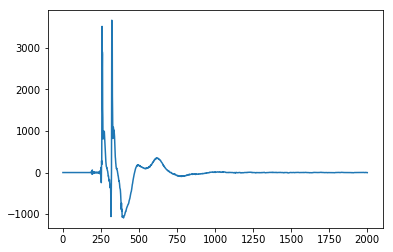

In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

N = 44100 # number of sample points
sampling_freq = 44100 
rec_time = (N-1) / sampling_freq

data = np.loadtxt("sound.csv", delimiter=",").flatten()
data = np.trim_zeros(data, 'b')
L = 2000
x = np.linspace(0, L, L)
plt.plot(x, data[:L])
plt.show()

In [6]:
from scipy.fftpack import fft

%matplotlib inline
from matplotlib import pyplot as plt
N_data, = data.shape #number of sample points in data array
T = rec_time / (N-1) #sample spacing
x = np.linspace(0.0, rec_time, N)
if (N-N_data>0):
    data = np.concatenate((data, np.zeros((N-N_data,))))
yf = fft(data)
xf = np.linspace(0, 1.0/(2.0*T), N//2)

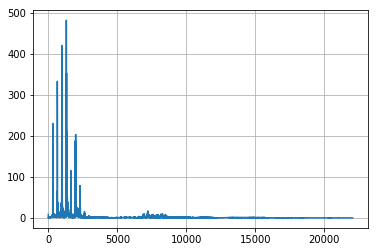

In [7]:
plt.figure(1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

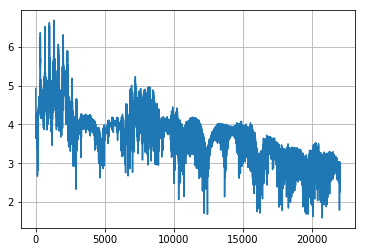

In [8]:
yf2 = 2.0/N * np.abs(yf[0:N//2]) + 10e-7
zf = np.log10(yf2 / 10e-5)
plt.figure(2)
plt.plot(xf, zf)
plt.grid()
plt.show()

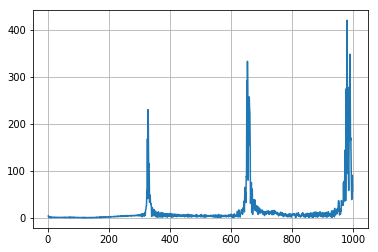

In [9]:
mask = (xf > 1) * (xf < 1000)
plt.figure(3)
plt.plot(xf[mask], yf2[mask])
plt.grid()
plt.show()

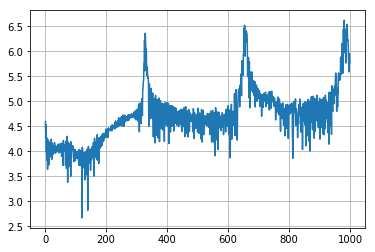

In [10]:
plt.figure(4)
plt.plot(xf[mask], zf[mask])
plt.grid()
plt.show()

In [11]:
from scipy.signal import blackman
w = blackman(N)
ywf = fft(data*w)
ywf2 = 2.0/N * np.abs(ywf[1:N//2])
zwf = np.log10(ywf2 / 10e-5)

plt.figure(5)
plt.semilogy(xf[mask], yf2[mask], '-b')
plt.semilogy(xf[1:][mask[1:]], ywf2[mask[1:]], '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

ValueError: operands could not be broadcast together with shapes (121472,) (44100,) 

NameError: name 'zwf' is not defined

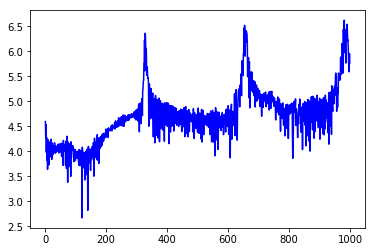

In [12]:
plt.figure(6)
plt.plot(xf[mask], zf[mask], '-b')
plt.plot(xf[mask], zwf[mask[1:]], '-r')
plt.legend(['log FFT', 'log FFT w. window'])
plt.grid()
plt.show()

In [15]:
print(xf.shape)
print(ywf2.shape)

(22050,)
(22049,)
